<a href="https://colab.research.google.com/github/sahibpreetsingh12/100daysofcode/blob/master/deep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf  # deep learning library. 

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  #  feed-forward model
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution


# **Training Model**

In [0]:
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

In [0]:
#not a part of training just for testing purposes
import matplotlib.pyplot as plt
#plt.imshow(x_train[1])# to check what kind of data are we having in datasets
print(x_train[1].shape)
print(x_train[1])#normalized values of pixel total 764 in count 28x28


In [0]:
model.fit(x_train, y_train, epochs=3)  # train the model

Epoch 1/3
60000/60000 [==============================] - 8s 134us/step - loss: 0.2606 - acc: 0.9228
Epoch 2/3
60000/60000 [==============================] - 7s 116us/step - loss: 0.1060 - acc: 0.9672
Epoch 3/3
60000/60000 [==============================] - 8s 127us/step - loss: 0.0721 - acc: 0.9771


# **To check overfitting**

In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 0s 33us/step
0.08800299704037606
0.9733


In [0]:
model.save('num_reader.model')

In [0]:
new_model = tf.keras.models.load_model('num_reader.model')

In [0]:
predictions = new_model.predict(x_test)
import numpy as np

print(np.argmax(predictions[1]))

2


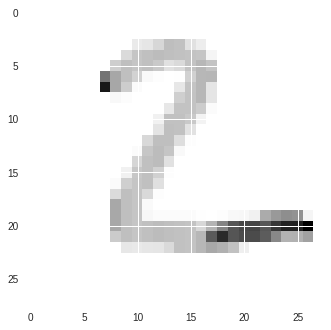

In [0]:
plt.imshow(x_test[1])
plt.show()
#this shows our prediction is correct